In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ares_params import ares_params, redshifts

# Functions

In [34]:
def check_limits(new_param, low, up): #to check if the new params exceed the reasonable limits or not (e.g f_Star>1)
    x = new_param.shape[0]
    y = new_param.shape[1]  
    summation = np.zeros(x)
    check_array=np.zeros((x, y), dtype=bool)
    result = True  
    for i in range(x):
        for j in range(y):
            #print(i)
            #print(j)
            if new_param[i, j] <= up[j]:
            
                if new_param[i, j] >= low[j]:
                    check_array[i, j] = True
                    
                else: 
                    check_array[i, j] = False
            else: 
                check_array[i, j] = False
        
            result = result & check_array[i, j]
        summation[i] = sum(check_array[i, :])
        
    counter = 0    
    for i in range(x):
        if (summation[i]<4):
            counter = counter +1
        
    return result, counter

In [3]:
low_bound = np.array([1E3, 1E37, 1E3, 0.05])
up_bound = np.array([1E6, 1E40, 1E6, 2])

In [19]:
a = [True, False, True]
print(sum(a))

2


# Load Data 

In [4]:
df1 = pd.read_csv("params.txt", sep=" ", header=None)

In [5]:
df1

,0,1,2,3
0,10000.000000,1.000000e+38,10000.000000,1.000000
1,11223.152386,1.008011e+38,10248.569034,0.961215
2,10632.395344,9.996781e+37,11350.633225,0.956876
3,12047.534258,1.097568e+38,10283.638236,0.931298
4,11291.919115,1.083585e+38,11136.659290,0.938490
...,...,...,...,...
999995,7671.084800,9.757379e+37,14308.629832,1.568130
999996,7400.494464,9.908108e+37,15451.897633,1.589666
999997,7461.360185,1.065163e+38,16147.751560,1.587723
999998,6289.749423,1.020338e+38,14911.040987,1.602856


In [6]:
nstep = 1000000
param_length = 4
key = ['pop_rad_yield_0_', 'pop_rad_yield_1_', 'pop_rad_yield_2_', 'clumping_factor']

In [7]:
#m =ps.iloc[:,0].tolist()
params = np.zeros((nstep, param_length))
for i in range(param_length):
    params[:, i] = list(df1.iloc[:, i])

print(np.shape(params))

(1000000, 4)


In [8]:
print(check_limits(params, low_bound, up_bound))

(True, 0)


# Remove the Burn-in phase

In [9]:
params_new = params[200000:-1, :]
print(np.shape(params_new))

(799999, 4)


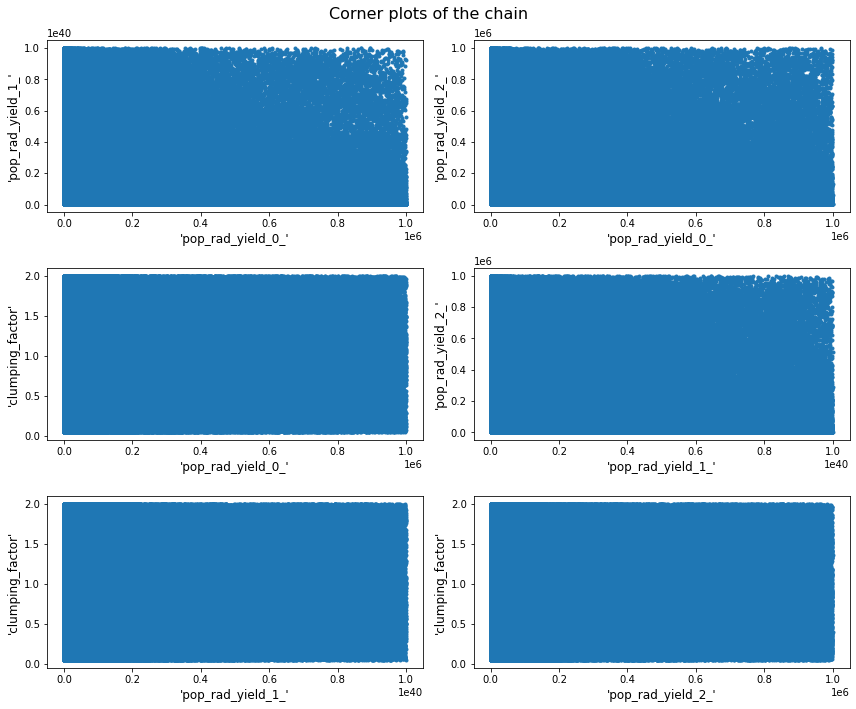

In [10]:
fig, ax_list = plt.subplots(3, 2, figsize=(12,10))
fig.suptitle('Corner plots of the chain', fontsize=16)

ax_list[0, 0].plot(params_new[:, 0], params_new[:, 1], linestyle = "", marker=".")
ax_list[0, 0].set_ylabel(repr(key[1]), fontsize=12)
ax_list[0, 0].set_xlabel(repr(key[0]), fontsize=12)

ax_list[0, 1].plot(params_new[:, 0], params_new[:, 2], linestyle = "", marker=".")
ax_list[0, 1].set_ylabel(repr(key[2]), fontsize=12)
ax_list[0, 1].set_xlabel(repr(key[0]), fontsize=12)
    
ax_list[1, 0].plot(params_new[:, 0], params_new[:, 3], linestyle = "", marker=".")
ax_list[1, 0].set_ylabel(repr(key[3]), fontsize=12)
ax_list[1, 0].set_xlabel(repr(key[0]), fontsize=12)

ax_list[1, 1].plot(params_new[:, 1], params_new[:, 2], linestyle = "", marker=".")
ax_list[1, 1].set_ylabel(repr(key[2]), fontsize=12)
ax_list[1, 1].set_xlabel(repr(key[1]), fontsize=12)

ax_list[2, 0].plot(params_new[:, 1], params_new[:, 3], linestyle = "", marker=".")
ax_list[2, 0].set_ylabel(repr(key[3]), fontsize=12)
ax_list[2, 0].set_xlabel(repr(key[1]), fontsize=12)

ax_list[2, 1].plot(params_new[:, 2], params_new[:, 3], linestyle = "", marker=".")
ax_list[2, 1].set_ylabel(repr(key[3]), fontsize=12)
ax_list[2, 1].set_xlabel(repr(key[2]), fontsize=12)

plt.tight_layout()
plt.show()

# Draw Samples

In [11]:
chain = params_new
for i in range(chain.shape[1]): # ommiting the mean from the chain
    chain[:,i] = chain[:,i] - np.mean(chain[:,i])

mycov=(chain.T@chain)/chain.shape[0]

In [12]:
def draw_samples(cov,n):
    m = cov.shape[0]
    mat = np.random.randn(m,n)
    #print(mat)
    L = np.linalg.cholesky(cov)
    #print(L)
    #the shape of the output is: number of samples * number of params
    return (L@mat).T

n = 10000
#n= 100000
#there is a huge bug here! we can not have negative values in our samples but the np.random.randn creats negative values!
#That's why we encounter negative values for params which is definately incorrect!
#By mathematical definition, gaussian can give negative results!

samples = draw_samples(mycov,n)
cov2 = samples.T@samples/n

In [13]:
#print(samples)
#There is another huge bug here! The returned samples does not respect the resonable range for each param!

In [14]:
np.shape(samples)

(10000, 4)

In [35]:
a, b = check_limits(samples, low_bound, up_bound)

In [36]:
b

9425

In [16]:
print(mycov)
print(cov2)

[[ 4.79758321e+10 -1.64729495e+43 -2.68702626e+09  6.41120904e+03]
 [-1.64729495e+43  4.40179102e+78  1.82570242e+43  3.30727728e+36]
 [-2.68702626e+09  1.82570242e+43  4.99392318e+10 -3.28993758e+03]
 [ 6.41120904e+03  3.30727728e+36 -3.28993758e+03  3.08793424e-01]]
[[ 4.75196293e+10 -1.51714765e+43 -2.79216945e+09  4.32743065e+03]
 [-1.51714765e+43  4.42399728e+78  2.71942096e+43  1.19024763e+37]
 [-2.79216945e+09  2.71942096e+43  4.99540767e+10 -1.79391101e+03]
 [ 4.32743065e+03  1.19024763e+37 -1.79391101e+03  3.12595021e-01]]


In [17]:
diff = mycov - cov2
diff_r = (diff/mycov)
print(diff_r)

[[ 9.50901175e-03  7.90066756e-02 -3.91299472e-02  3.25021128e-01]
 [ 7.90066756e-02 -5.04482500e-03 -4.89520379e-01 -2.59887461e+00]
 [-3.91299472e-02 -4.89520379e-01 -2.97259445e-04  4.54727949e-01]
 [ 3.25021128e-01 -2.59887461e+00  4.54727949e-01 -1.23111325e-02]]


# Removing <0 enteries

In [18]:
np.savetxt('samples.txt', samples)